¡Hola, Javier!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Javier! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en una analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es el mejor videojuego?

Analizaremos los videojuegos del período 2016 con base al raiting y a las ventas a nivel mundial con las que contamos.

In [2]:
# Cargamos librerias requeridas

import pandas as pd
from math import factorial
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

## Carga de Datos

In [3]:
# Cargamos el dataset games

games = pd.read_csv('G:/.shortcut-targets-by-id/1ec4irvsZdM58w7ZpjkoK9daldWphQX4A/Proyectos/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparacion de Datos

Exploramos los datos y realizamos las correcciones pertinentes

In [4]:
# Visualizamos toda la información del dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Reemplazamos columnas a minúsculas
new_columns=[]
for name in games.columns:
    minuscula = name.lower()
    new_columns.append(minuscula)

games.columns = new_columns
games.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Revisamos que no hay duplicados
duplicados = games.duplicated().sum()
duplicados

np.int64(0)

Se convierte __user_score__ a float debido a que son calificaciones que se pueden agrupar y como objeto no se podrian trabajar. Adicional se identifica el año de lanzamiento como objeto con valores ausentes los cuales se sustituyen a 0 ya que no tendria sentido dejar Nan para poder trabajar los datos y no tenemos afectación ya que poriamos considerar los juegos que tiene 0 como videojuegos muy viejos que no tenian registro.

In [8]:
año_nombre = games[['name','year_of_release']]
año_limpio =año_nombre.dropna()
año_limpio = año_limpio.drop_duplicates(subset='name')

In [9]:
games = games.merge(año_limpio, on='name', how='left', suffixes=('', '_agregado'))
games['year_of_release'] = games['year_of_release'].fillna(games['year_of_release_agregado'])
games =games.drop(columns=['year_of_release_agregado'])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
<b>Se completaron los años de lanzamiento con otras plataformas que tenian el mismo juego sin embargo aun tenemos valores ausentes que rellenaremos con 0 ya que no seria la mejor desición completar con media, mediana o moda ya que afectarian al analisis.</b> <a class=“tocSkip”></a>
</div>

In [10]:
# Covertimos la datos al formato necesario
games.fillna({'year_of_release':0}, inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] =pd.to_numeric(games['user_score'], errors='coerce') # Se convierte a float y todos lo valores como tbd se convierten en ausentes ya que es un score sin definir por lo que podemos dejarlo en nan

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

Revisamos valores ausentes en el nombre del videojuego

In [11]:
ausentes_name = games[games['name'].isna()]
ausentes_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


No tienen informacion relevante por lo que podemos eliminar los 2 registros

In [12]:
games.dropna(subset=['name'], inplace=True)

In [13]:
games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.404715
dtype: float64

<div class="alert alert-block alert-info">
<b>Dejamos los valores tal cual ya que si decidimos eliminarlos perderiamos el 50% de los datos el cual sesga nuestro analisis, por otro lado si decidimos sustituir por la media o moda no seria lo correcto ya que modificariamos la distribucion de los datos en la parte del score y rating</b> <a class=“tocSkip”></a>
</div>

In [14]:
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

<div class="alert alert-block alert-info">
<b>Se completan los score con la mediana para no sesgar nuestros resultados</b> <a class=“tocSkip”></a>
</div>

Calculamos las ventas totales de cada juego

In [15]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Solamente en estos casos cuando trabajamos con distribuciones sesgadas como en este caso se recomienda completar los valores nulos con la mediana para no sesgar nuestros resultados




## Analisis de Datos

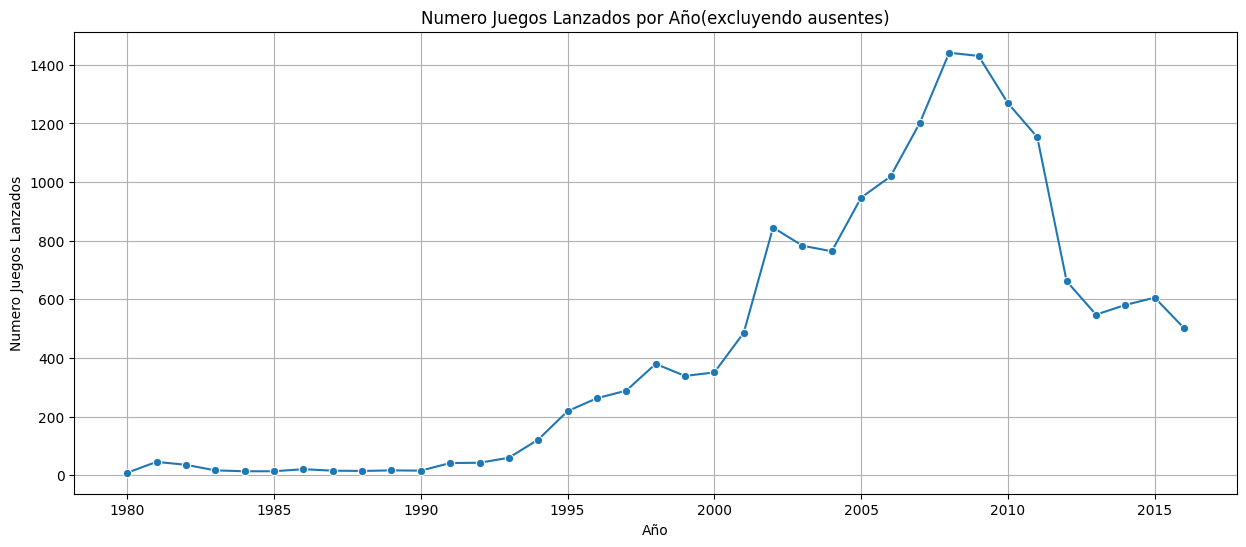

In [16]:
juegos_año = games.groupby('year_of_release')['name'].size()
juegos_totales= juegos_año.sum()
porcentaje_juegos= (juegos_año / juegos_totales)*100
porcentaje_juegos
resultado = pd.DataFrame({'numero_juegos': juegos_año,
                          'porcentaje': porcentaje_juegos})
resultado

juegos = resultado.iloc[1:]  #Excuimos primer registro de valores ausentes
plt.figure(figsize=(15,6))
sns.lineplot(x='year_of_release', y ='numero_juegos', data=juegos, marker ='o')
plt.title('Numero Juegos Lanzados por Año(excluyendo ausentes)')
plt.xlabel('Año')
plt.ylabel('Numero Juegos Lanzados')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Observamos que apartir del año 2000 tuvo un incremento  significativo el lanzamiento de juegos representando mas del 85% de los juegos del año 2000 al 2016. Los datos de los juegos de 1980 a 2000 no son significativos ya que representan menos del 12%.</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo con el desarrollo de la gráfica, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo




In [17]:
sales_platform = games.groupby('platform')['total_sales'].sum().reset_index(name='venta_total').sort_values(by='venta_total', ascending=False)
sales_platform

,platform,venta_total
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Filtramos las plataformas con mayor a 400 mdp en venta y procedemos al analisis.

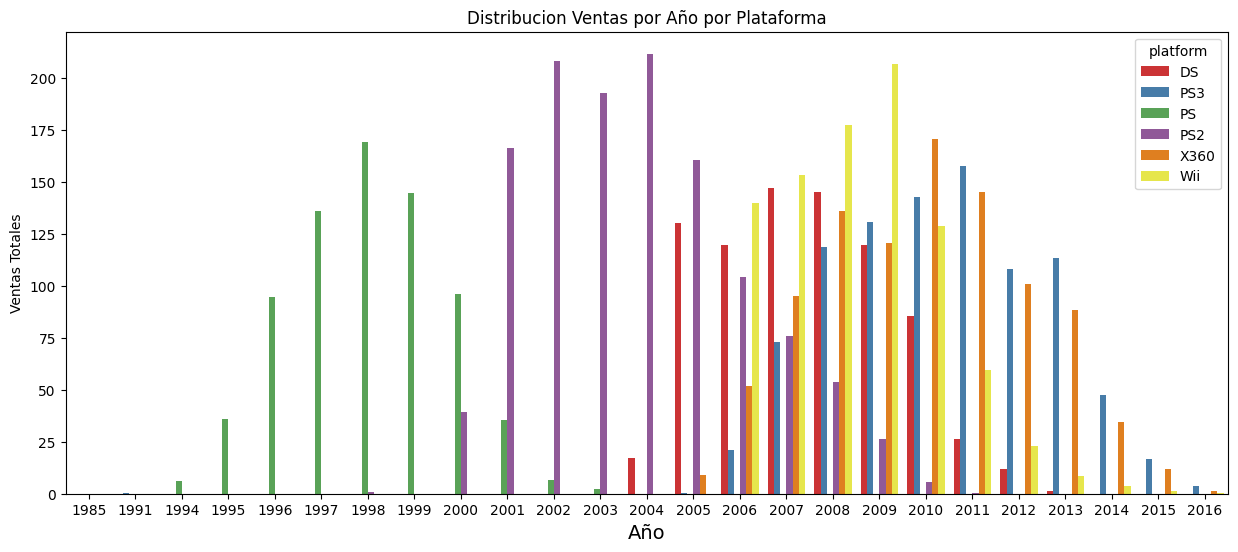

In [18]:
filtered_platform_top = games.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"] & year_of_release > 0') # Elegimos plataformas y quitamos valores ausentes
vtas_platform_año = filtered_platform_top.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=vtas_platform_año, palette='Set1')
plt.title('Distribucion Ventas por Año por Plataforma')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ventas Totales')
plt.show()

<div class="alert alert-block alert-info">
<b>Observamos que cada plataforma duran en el mercado 10 años en la cual convive con nuevas plataformas aproximadamente de 3 a 4 años, por lo que podemos concluir que el tiempo en que aparece una nueva plataforma es de 5 años y el tiempo en el que desaparece despues de salir la nueva plataforma es de 4 a 5 años. </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-info">
<b>Se decide tomar la información apartir del año 2006  </b> <a class=“tocSkip”></a>
</div>

In [19]:
# Filtramos nustro dataset para tener la informacion de 2006 y eliminamos valores ausentes
filtered_current = games.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"] & year_of_release > 2006')
filtered_current

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,7.5,E,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,71.0,7.5,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,71.0,7.5,NaN,0.00


In [20]:
ventas_top = filtered_current.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
ventas_top

,platform,total_sales
2,PS3,913.56
4,X360,905.60
3,Wii,763.12
0,DS,537.04
1,PS2,162.49


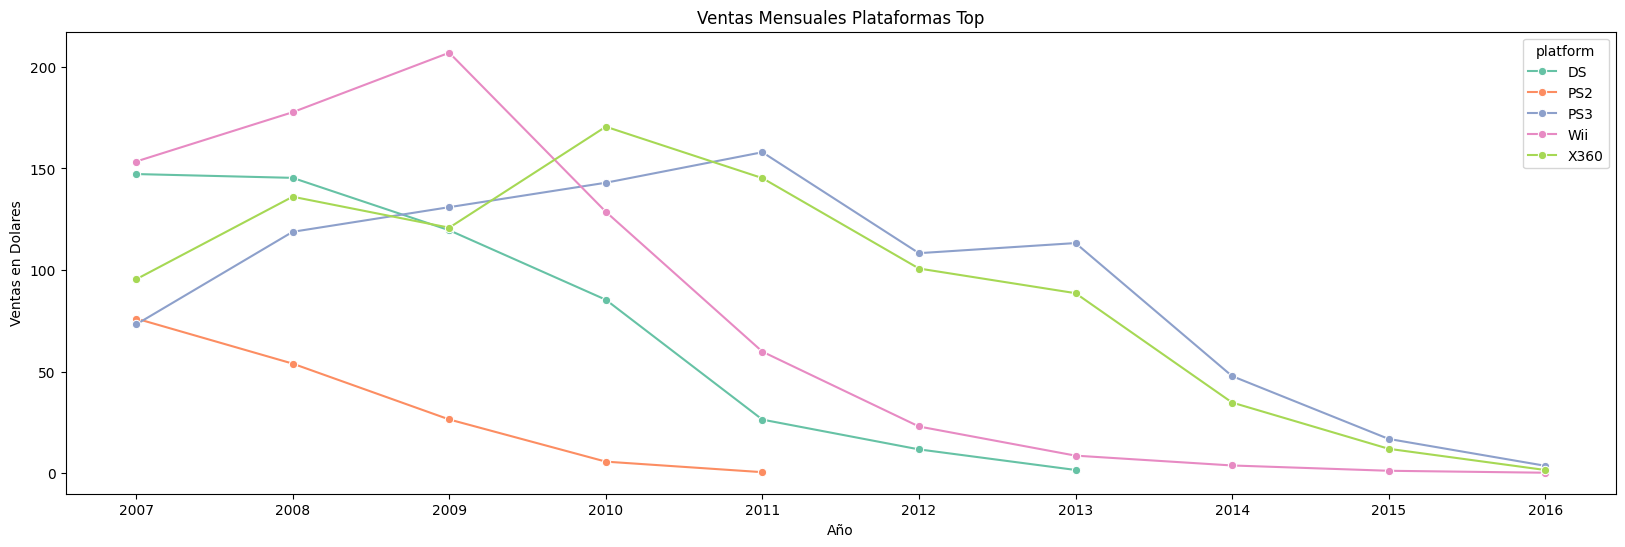

In [21]:
ventas_top_mes = filtered_current.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(x='year_of_release', y ='total_sales', data=ventas_top_mes, marker ='o', hue='platform', palette='Set2')
plt.xticks(range(min(ventas_top_mes['year_of_release']),max(ventas_top_mes['year_of_release'])+1,1))
plt.title('Ventas Mensuales Plataformas Top')
plt.xlabel('Año')
plt.ylabel('Ventas en Dolares')
plt.show()

<div class="alert alert-block alert-info">
<b>Las plataformas DS y PS2 desaparecen, sin embargo a pesar que las top 3 son PS3, X360 y Wii tambien tienen una tendencia negativa , esto debido a que posiblemente en el transucrso del 2014 a 2016 salieron nuevas plataformas de las cuales no se obtuvieron datos para el analisis.  </b> <a class=“tocSkip”></a>
</div>

Text(0, 0.5, 'Ventas')

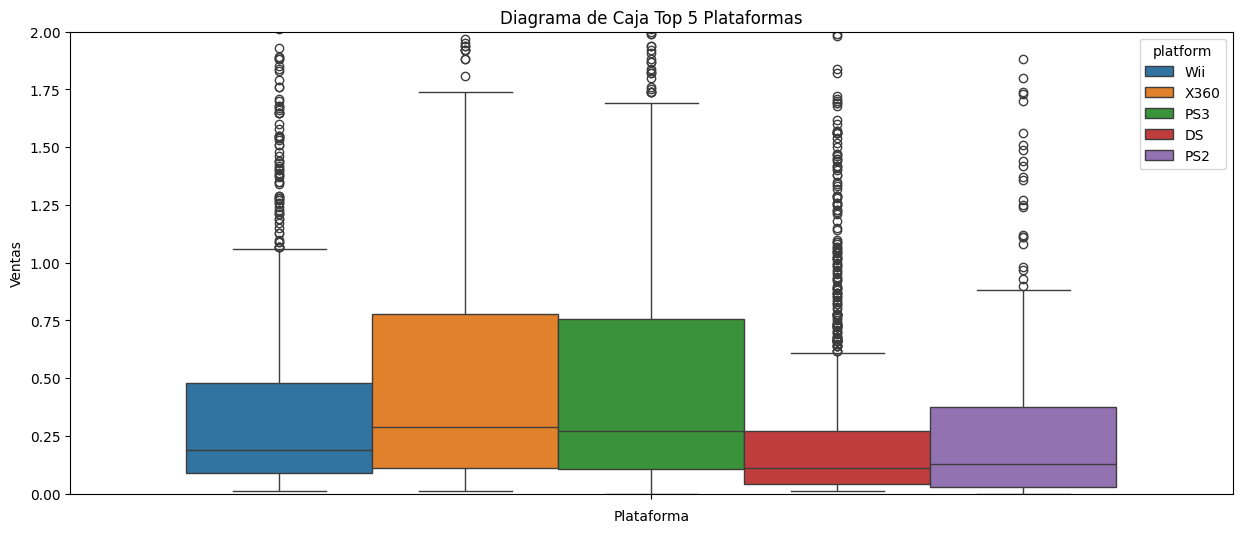

In [22]:
# Filtramos los valores de las del top 5 plataformas
filtered_top = games.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]& year_of_release > 2006')

# Creamos diagrama de caja para las 5 plataformas
plt.figure(figsize=(15,6))
sns.boxplot(hue='platform', y='total_sales', data=filtered_top)
plt.ylim(0,2)
plt.title('Diagrama de Caja Top 5 Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')


<div class="alert alert-block alert-info">
<b>Podemos concluir que las plataformas con mayores ingresos tienen una venta promedio similar debido a que son las mas actuales, el resto de las plataformas tienen una venta promedio menor esto debido principalmente a que los usuarios prefieren juegos de nuevas plataformas. Adicional se puede deducir que cada plataforma tiene su top de juegos ya que existen demasiados outliers en cada una de las 5 plataformas.   </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

,total_sales,critic_score
total_sales,1.000000,0.448455
critic_score,0.448455,1.000000


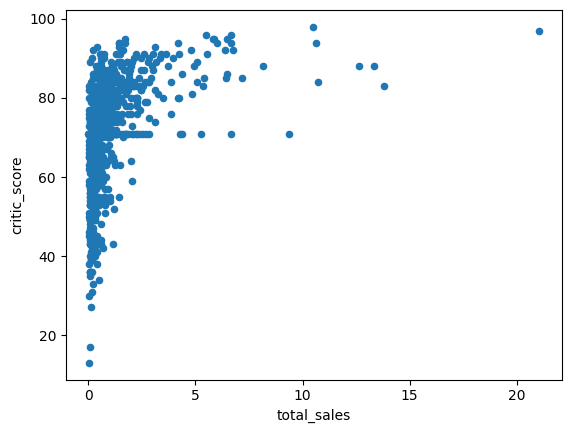

In [23]:
# Analisis de correlacion reseñas profesionales
filtered_ps3 = games.query('platform == "PS3"') # Filtramos plataforma PS#
filtered_ps3.head()
filtered_ps3[['total_sales','critic_score']].plot(kind='scatter',x='total_sales', y='critic_score')
filtered_ps3[['total_sales','critic_score']].corr(method='spearman')

,total_sales,user_score
total_sales,1.000000,0.057958
user_score,0.057958,1.000000


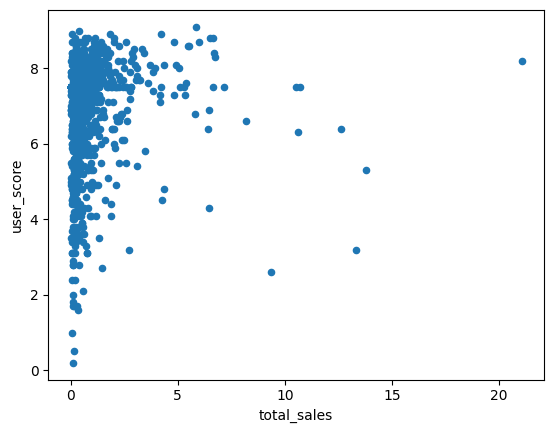

In [24]:
# Analisis de correlacion reseñas usuarios
filtered_ps3 = games.query('platform == "PS3"') # Filtramos plataforma PS#
filtered_ps3.head()
filtered_ps3[['total_sales','user_score']].plot(kind='scatter',x='total_sales', y='user_score')
filtered_ps3[['total_sales','user_score']].corr(method='spearman')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el análisis de la relación de score con las ventas

<div class="alert alert-block alert-info">
<b>No existe una correlación entre la critica de los usuarios y profesionales con respecto a las ventas de cada juego en la plataforma de PS3   </b> <a class=“tocSkip”></a>
</div>

In [25]:
# Revisamos los juegos de PS3
juego_vendio_PS3 = filtered_ps3.groupby('name')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
juego_vendio_PS3

,name,total_sales
410,Grand Theft Auto V,21.05
153,Call of Duty: Black Ops II,13.79
156,Call of Duty: Modern Warfare 3,13.33
151,Call of Duty: Black Ops,12.63
405,Gran Turismo 5,10.70
...,...,...
903,Rugby League Live 3,0.01
1281,Winning Post 7 Maximum 2008,0.01
1035,Strider (2014),0.01
22,Agarest Senki: Re-appearance,0.01


In [26]:
# Comparamos los 3 primeros juegos vs. otras plataformas
comparativo_juegos = games.query('name in ["Grand Theft Auto V","Call of Duty: Black Ops II"] & platform in["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
comparativo_juegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


<div class="alert alert-block alert-info">
<b>No existe variacion en el total de ventas en los 2 juegos seleccionados únicamente se distribuye de manera diferente entre regiones    </b> <a class=“tocSkip”></a>
</div>

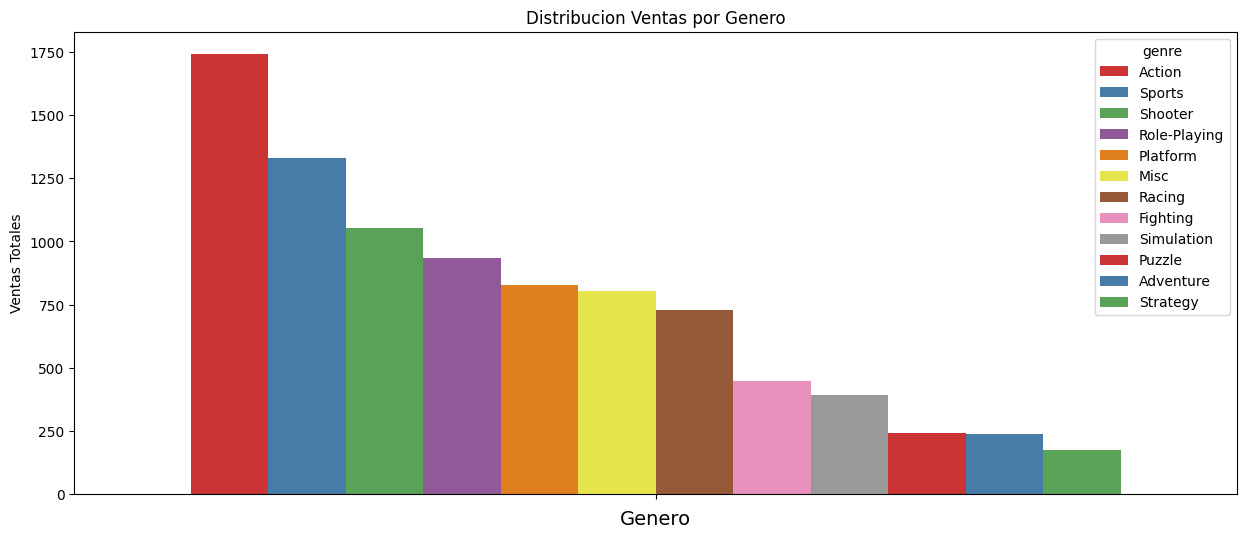

In [27]:
sales_genero = games.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(hue='genre', y='total_sales', data=sales_genero, palette='Set1')
plt.title('Distribucion Ventas por Genero')
plt.xlabel('Genero', fontsize=14)
plt.ylabel('Ventas Totales')
plt.show()

<div class="alert alert-block alert-info">
<b>Los clientes prefieren comprar juegos de accion y deportes que de estrategia y aventura por lo que podemos concluir que debemos desarrollar juegos enfocados a la acción con un complemente de deporte.    </b> <a class=“tocSkip”></a>
</div>

## Perfil Usuario para cada Region

In [28]:
filtered_platform_top
perfil = filtered_platform_top.groupby('platform').agg(
    prom_na = ('na_sales', 'mean'),
    prom_eu = ('eu_sales', 'mean'),
    prom_jp = ('jp_sales', 'mean'),

).reset_index()
perfil

,platform,prom_na,prom_eu,prom_jp
0,DS,0.179136,0.088643,0.082208
1,PS,0.281277,0.178479,0.117462
2,PS2,0.271070,0.157500,0.064364
3,PS3,0.296667,0.249220,0.060242
4,Wii,0.379716,0.200984,0.053075
5,X360,0.479320,0.215832,0.009864


<div class="alert alert-block alert-info">
<b>Las cuotas para cada region son diferentes, se observa que para Japón las cuotas son mas bajas en el entendido que ellos crean principalmente todos los videojuegos, sin embargo para Norteamérica y Estados Unidos es el doble de lo que Japón tiene aislando la plataforma DS y PS que tienen cuotas similares a Japon.    </b> <a class=“tocSkip”></a>
</div>

In [29]:
top_genre = games.query('genre in ["Action","Sports","Shooter","Role-Playing","Platfor"]')

genero_region = top_genre.groupby(['genre']).agg(
    sum_na = ('na_sales', 'sum'),
    sum_eu = ('eu_sales', 'sum'),
    sum_jp = ('jp_sales', 'sum'),

).reset_index()
genero_region

,genre,sum_na,sum_eu,sum_jp
0,Action,879.01,519.13,161.43
1,Role-Playing,330.81,188.71,355.41
2,Shooter,592.24,317.34,38.76
3,Sports,684.43,376.79,135.54


<div class="alert alert-block alert-info">
<b>Para los principales géneros Norteamérica y Estados Unidos prefieren los mismos generos sin embargo Japón se inclina mas a juegos de Role-Playing y Acción, lo cual nos indica que debemos enfocarnos en la distribución de juegos de acción. Adicional podriamos decir que para Japón si influye la clasificación ESRB    </b> <a class=“tocSkip”></a>
</div>

## Prueba Hipotesis

### Prueba 1

Seleccionamos nuestras 2 muestras

In [30]:
# Necesitamos obtener nuestras 2 muestras
xbox_one = games.query ('platform == "XOne"')
clean_xone = xbox_one.dropna(subset=['user_score']) # Limpiamos la base
ps = games.query ('platform == "PS"')
clean_ps = ps.dropna(subset=['user_score']) # Limpiamos la base

Revisamos si las varianzas son iguales o diferentes.

In [36]:
alpha = 0.05  # Nivel de significancia
p_value_levene= stats.levene(clean_xone['user_score'], clean_ps['user_score']).pvalue

# Ho = Varianzas son iguales.
# H1 = Las varianzas son diferentes

if p_value_levene < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print("Aceptamos la hipotesis nula")


Rechazamos la hipotesis nula


Aplicamos prueba de hipotesis.

In [32]:
alpha = 0.05

resultados = stats.ttest_ind(clean_xone['user_score'], clean_ps['user_score'], equal_var=False)

# Imprimir el valor p
print('Valor p:', resultados.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 1.969273838719563e-18
Rechazamos la hipótesis nula


<div class="alert alert-block alert-info">
<b> La hipotesis nula es: las calificaciones promedio de los usuarios para plataformas Xbox One y PS son las mismas; al aplicar nuestro método el valor p es mucho menor al valor de significancia alpha por lo que se rechaza la hipotesis.   </b> <a class=“tocSkip”></a>
</div>

### Prueba 2

Seleccionamos nuestras 2 muestras

In [33]:
# Necesitamos obtener nuestras 2 muestras
accion = games.query ('genre == "Action"')
clean_accion = accion.dropna(subset=['user_score']) # Limpiamos la base
sports = games.query ('genre == "Sports"')
clean_sports = sports.dropna(subset=['user_score']) # Limpiamos la base

Revisamos si las varianzas son iguales o diferentes.

In [34]:
alpha = 0.05  # Nivel de significancia
p_value_levene= stats.levene(clean_accion['user_score'], clean_sports['user_score']).pvalue

# Ho = Varianzas son iguales.
# H1 = Las varianzas son diferentes

if p_value_levene < alpha:
    ('Rechazamos la hipotesis nula')
else:
    print("Aceptamos la hipotesis nula")

Aceptamos la hipotesis nula


Aplicamos prueba de hipotesis.

In [35]:


alpha = 0.05

resultados = stats.ttest_ind(clean_accion['user_score'], clean_sports['user_score'], equal_var=True)

# Imprimir el valor p
print('Valor p:', resultados.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 0.7131417795320426
No podemos rechazar la hipótesis nula


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(clean_xone['user_score'], clean_ps['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b> Se aplica método levene   </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-info">
<b> La hipotesis nula es: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.; al aplicar nuestro método el valor p es mayor al valor de significancia alpha por lo que no se rechaza la hipotesis.   </b> <a class=“tocSkip”></a>
</div>

# CONCLUSIONES

<div class="alert alert-block alert-info">
<b> Los años de mejores ventas se dan apartir de 2006 con la entrada de nuevas plataformas, sin embargo las plataformas con mayor performance son PS3 y XBOX360 sin embargo cada plataforma tiene juegos top que se diferencian de las demas ya que existen varios outliers entre caja.

Adicional observamos que no existe correlacion entre la calificación de los usuarios y profesionales con las ventas ya que posiblemente un juego pueda ser muy caro lo cual no permite al usuario la compra del mismo. Es importante mencionar que debemos enfocarnos a los generos de accion y deportes, así como hacer un diferenciador por cada región para optimizar nuestros ingresos ya que la región de Japón se comporta diferente y tiene cuotas mas bajas que Norteamérica y Estados Unidos.

Es importante mencionar que la vida de cada plataforma es de 10 años  y conviven con las nuevas plataformas aproximadamente 3 años por lo que tendríamos que considerar dichos supuestos para proyectar de manera correcta.   </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Javier, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>